In [1787]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', 50)

# EDA

In [1788]:
df_main = pd.read_csv("profiles.csv")
df_main.shape

(60552, 31)

In [1789]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60552 entries, 0 to 60551
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job 

In [1790]:
df_main.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [1791]:
df_main = df_main.drop(['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9'],axis=1)

# Yorum olduğu için attım

In [1792]:
df_main.isnull().sum()

age            51038
body_type      51886
diet           54791
drinks         51540
drugs          53337
education      52093
ethnicity      51987
height         51038
income         51038
job            52369
last_online    51038
location       51038
offspring      56666
orientation    51038
pets           54200
religion       54291
sex            51038
sign           52776
smokes         51956
speaks         51044
status         51038
dtype: int64

Verimizin çoğu boş ve max 9514 dolu olan sütun var

Bu yüzden age'de boş olmayan verileri aldım

In [1793]:
filled= df_main.loc[df_main['age'].notnull(), df_main.columns]

missing = df_main.loc[df_main['age'].isnull(), df_main.columns]

In [1794]:
filled.shape , missing.shape

((9514, 21), (51038, 21))

In [1795]:
missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51038 entries, 9514 to 60551
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          0 non-null      float64
 1   body_type    0 non-null      object 
 2   diet         0 non-null      object 
 3   drinks       0 non-null      object 
 4   drugs        0 non-null      object 
 5   education    0 non-null      object 
 6   ethnicity    0 non-null      object 
 7   height       0 non-null      float64
 8   income       0 non-null      float64
 9   job          0 non-null      object 
 10  last_online  0 non-null      object 
 11  location     0 non-null      object 
 12  offspring    0 non-null      object 
 13  orientation  0 non-null      object 
 14  pets         0 non-null      object 
 15  religion     0 non-null      object 
 16  sex          0 non-null      object 
 17  sign         0 non-null      object 
 18  smokes       0 non-null      object 
 19  s

In [1796]:
filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9514 entries, 0 to 9513
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   ethnicity    8565 non-null   object 
 7   height       9514 non-null   float64
 8   income       9514 non-null   float64
 9   job          8183 non-null   object 
 10  last_online  9514 non-null   object 
 11  location     9514 non-null   object 
 12  offspring    3886 non-null   object 
 13  orientation  9514 non-null   object 
 14  pets         6352 non-null   object 
 15  religion     6261 non-null   object 
 16  sex          9514 non-null   object 
 17  sign         7776 non-null   object 
 18  smokes       8596 non-null   object 
 19  speaks

In [1797]:
df = filled.copy()

In [1798]:
df.isnull().sum()

age               0
body_type       848
diet           3753
drinks          502
drugs          2299
education      1055
ethnicity       949
height            0
income            0
job            1331
last_online       0
location          0
offspring      5628
orientation       0
pets           3162
religion       3253
sex               0
sign           1738
smokes          918
speaks            6
status            0
dtype: int64

__Smokes__

In [1799]:
df["smokes"].value_counts()

no                7011
sometimes          565
when drinking      480
yes                307
trying to quit     233
Name: smokes, dtype: int64

In [1800]:
df["smokes"] = df["smokes"].fillna("no")

In [1801]:
df["smokes"] = df["smokes"].replace(["when drinking" , "sometimes" ,"trying to quit"] , "sometimes")

In [1802]:
df["smokes"] = df["smokes"].replace({"yes":2 , "sometimes":1 , "no":0})

In [1803]:
df["smokes"].value_counts()

0    7929
1    1278
2     307
Name: smokes, dtype: int64

__BODY Type__

In [1804]:
df["body_type"].value_counts()

average           2274
fit               2040
athletic          1888
thin               740
curvy              626
a little extra     430
skinny             269
full figured       181
overweight          69
jacked              64
used up             47
rather not say      38
Name: body_type, dtype: int64

In [1805]:
df['body_type'] = df['body_type'].replace('rather not say','a little extra')

In [1806]:
df['body_type'] = df['body_type'].fillna('average')

In [1807]:
body_notnull =  df.loc[df['body_type'].notnull(), ["age" , "height" , "sex" ,"smokes" , "body_type"]]
body_null = df.loc[df['body_type'].isnull(), ["age" , "height" , "sex" ,"smokes" , "body_type"]]


In [1808]:
body_notnull.shape , body_null.shape

((9514, 5), (0, 5))

In [1809]:
x_train , y_train  = body_notnull.drop("body_type" , axis = 1) , body_notnull["body_type"]

x_test = body_null.drop("body_type" ,axis=1)

In [1810]:
from sklearn.ensemble import RandomForestClassifier

r = RandomForestClassifier()

In [1811]:
x_train = pd.get_dummies(x_train)

In [1812]:
x_test = pd.get_dummies(x_test)

In [1813]:
r.fit(x_train , y_train)

RandomForestClassifier()

In [1814]:
#tahmin = r.predict(x_test)

In [1815]:
#body_null["body_type"] = tahmin

In [1816]:
#df["body_type"].loc[df["body_type"].isnull()] = body_null["body_type"]

In [1817]:
df.isnull().sum()

age               0
body_type         0
diet           3753
drinks          502
drugs          2299
education      1055
ethnicity       949
height            0
income            0
job            1331
last_online       0
location          0
offspring      5628
orientation       0
pets           3162
religion       3253
sex               0
sign           1738
smokes            0
speaks            6
status            0
dtype: int64

__DİET__

In [1818]:
df["diet"].value_counts()

mostly anything        2621
anything               1067
strictly anything       835
mostly vegetarian       568
mostly other            154
strictly vegetarian     135
vegetarian              111
strictly other           64
mostly vegan             52
other                    52
strictly vegan           40
vegan                    28
mostly halal             13
mostly kosher            12
strictly halal            4
strictly kosher           2
kosher                    2
halal                     1
Name: diet, dtype: int64

In [1819]:
df['diet'] = df['diet'].replace({'strictly anything':'anything','mostly other':'other',
                                 'mostly anything':'anything','mostly vegetarian':'vegetarian',
                                 'strictly vegan':'vegan','strictly vegetarian':'vegetarian',
                                 'mostly vegan':'vegan','strictly other':'other',
                                 'mostly halal':'halal','mostly kosher':'kosher',
                                 'strictly halal':'halal','strictly kosher':'kosher'})

In [1820]:
df["diet"].value_counts()

anything      4523
vegetarian     814
other          270
vegan          120
halal           18
kosher          16
Name: diet, dtype: int64

In [1821]:
df['diet'] = df['diet'].fillna('anything')

__Drinks__

In [1822]:
df["drinks"].value_counts()

socially       6679
rarely          911
often           809
not at all      509
very often       54
desperately      50
Name: drinks, dtype: int64

In [1823]:
df['drinks'] = df['drinks'].replace({'socially':2, 'often':3, 'not at all':0, 'rarely':1, 'nan':np.nan,
                                     'very often':4,'desperately':5}) 

In [1824]:
df["drinks"].value_counts()

2.0    6679
1.0     911
3.0     809
0.0     509
4.0      54
5.0      50
Name: drinks, dtype: int64

In [1825]:
df['drinks'] = df['drinks'].fillna(2)

__Drugs__

In [1826]:
df["drugs"].value_counts()

never        5972
sometimes    1181
often          62
Name: drugs, dtype: int64

In [1827]:
df['drugs'] = df['drugs'].replace({'never':0, 'sometimes':1, 'nan':np.nan, 'often':2}) 
df['drugs'] = df['drugs'].fillna(0)

In [1828]:
df.isnull().sum()

age               0
body_type         0
diet              0
drinks            0
drugs             0
education      1055
ethnicity       949
height            0
income            0
job            1331
last_online       0
location          0
offspring      5628
orientation       0
pets           3162
religion       3253
sex               0
sign           1738
smokes            0
speaks            6
status            0
dtype: int64

__Education__

In [1829]:
df["education"].value_counts()

graduated from college/university    3770
graduated from masters program       1402
working on college/university         969
working on masters program            251
graduated from two-year college       245
graduated from high school            205
graduated from ph.d program           203
graduated from law school             177
working on two-year college           159
working on ph.d program               159
dropped out of college/university     149
college/university                    134
graduated from space camp             104
dropped out of space camp              87
working on space camp                  73
graduated from med school              73
working on law school                  55
two-year college                       43
working on med school                  41
dropped out of two-year college        34
masters program                        21
working on high school                 20
dropped out of ph.d program            19
dropped out of masters program    

In [1830]:
df["education"] = df["education"].replace(["graduated from college/university" ,"graduated from masters program" ,"working on masters program" ,"graduated from two-year college" ,"graduated from ph.d program" ,"graduated from law school","working on ph.d program","college/university","graduated from med school" ,"working on law school","working on med school","masters program","dropped out of ph.d program","dropped out of masters program","law school" , "working on college/university" ,"ph.d program"] , "university")

In [1831]:
df["education"] = df["education"].replace(["graduated from high school" ,"dropped out of college/university","dropped out of space camp","dropped out of two-year college","working on high school","high school","dropped out of law school","dropped out of med school"],"high school")

In [1832]:
df["education"] = df["education"].replace(["working on two-year college","two-year college"],"college")

In [1833]:
df["education"] = df["education"].replace(["graduated from space camp","working on space camp","space camp"] , "space camp")

In [1834]:
df["education"] = df["education"].fillna("university")

__ethnicity__

In [1835]:
df["ethnicity"]  =df["ethnicity"].fillna("white")

In [1836]:
df["ethnicity"].unique()

array(['asian, white', 'white', 'asian, black, other', 'white, other',
       'hispanic / latin, white', 'hispanic / latin',
       'pacific islander, white', 'asian', 'black, white',
       'pacific islander', 'asian, native american',
       'asian, pacific islander', 'black, native american, white',
       'middle eastern, other', 'native american, white', 'indian',
       'black', 'black, native american, hispanic / latin, other',
       'black, native american, hispanic / latin',
       'asian, black, pacific islander',
       'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other',
       'other', 'hispanic / latin, other', 'asian, black',
       'middle eastern, white', 'native american, white, other',
       'black, native american', 'black, white, other',
       'hispanic / latin, white, other', 'middle eastern', 'black, other',
       'native american, hispanic / latin, white', 'black, indian',
       'indian, white, other', '

In [1837]:
df["ethnicity"] = df["ethnicity"].replace(["asian, white" "pacific islander" ,"asian" ,"asian, pacific islander" ,"indian","asian, black, pacific islander" , "indian, white, other" ,"middle eastern, indian, other" ,"indian, white" ,"asian, white, other" ,"asian, hispanic / latin, white" ,"asian, indian" , "asian, native american, hispanic / latin, white"  ,"asian, white" ,"pacific islander" ,"asian, native american" , "asian, native american, white, other" ,"indian, other" ,"asian, pacific islander, other","native american, pacific islander","asian, pacific islander, white","asian, hispanic / latin" ,"asian, other"] , "asian")

In [1838]:
df["ethnicity"] = df["ethnicity"].replace(["white, other" ,"pacific islander, white", "native american, white" ,"middle eastern, white" ,"native american, white, other" ,"pacific islander, other" ,"middle eastern, native american, white" ,"pacific islander, hispanic / latin, white" ,"native american",""] , "white")

df["ethnicity"] = df["ethnicity"].replace(["hispanic / latin, white" ,"hispanic / latin, other" ,"hispanic / latin, white, other" ,"pacific islander, hispanic / latin" ,"native american, hispanic / latin" ,"indian, hispanic / latin" ,"native american, hispanic / latin, white","native american, hispanic / latin, white, other"] , "hispanic / latin")

df["ethnicity"] = df["ethnicity"].replace(["asian, black, other" ,"black, native american, hispanic / latin" ,"asian, black","black, native american" ,"black, pacific islander" ,"black, other" ,"black, hispanic / latin","black, indian","black, native american, other"] , "black")



In [1839]:
df["ethnicity"] = df["ethnicity"].replace(["middle eastern, other" ,"middle eastern, indian" ,"middle eastern, white, other" ,"middle eastern, hispanic / latin, white, other"],"middle eastern")

In [1840]:
df["ethnicity"] = df["ethnicity"].replace(["black, white" ,"black, native american, white" ,"black, native american, hispanic / latin, other" ,"asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other","black, white, other","native american, hispanic / latin, white', 'black, indian","black, native american, hispanic / latin, white, other","black, hispanic / latin, white","middle eastern, hispanic / latin","asian, black, native american, pacific islander, white","black, native american, white, other","black, hispanic / latin, other" ,"asian, black, native american" ,"black, native american, hispanic / latin, white" ,"asian, black, native american, hispanic / latin, white" ,"asian, black, white","asian, black, native american, pacific islander, other" ,"middle eastern, hispanic / latin, white" ,"asian, native american, hispanic / latin, white, other" "asian, hispanic / latin', 'asian, pacific islander, white, other", "middle eastern, black, pacific islander, white" ,"asian, black, native american, hispanic / latin","native american, other', 'black, indian, white","black, native american, indian, white",""] , "other")


In [1841]:
df["ethnicity"].value_counts()

white                                                                                               6501
asian                                                                                               1346
hispanic / latin                                                                                     697
other                                                                                                449
black                                                                                                402
middle eastern                                                                                        73
black, pacific islander, hispanic / latin                                                              2
asian, native american, white                                                                          2
asian, middle eastern, white, other                                                                    2
pacific islander, white, other                         

In [1842]:
for i in range(len(df)):
    if 'white'== df['ethnicity'][i]:
        print("")
    elif 'asian'== df['ethnicity'][i]:
        print("")
    elif 'hispanic / latin'== df['ethnicity'][i]:
        print("")
    elif 'black'== df['ethnicity'][i]:
        print("")
    elif 'middle eastern'== df['ethnicity'][i]:
        print("")
    elif 'other'== df['ethnicity'][i]:
        print("")
    
    else:
        df["ethnicity"][i] ="other"


In [1843]:
df.isnull().sum()

age               0
body_type         0
diet              0
drinks            0
drugs             0
education         0
ethnicity         0
height            0
income            0
job            1331
last_online       0
location          0
offspring      5628
orientation       0
pets           3162
religion       3253
sex               0
sign           1738
smokes            0
speaks            6
status            0
dtype: int64

__İncome__


In [1844]:
df["income"].value_counts()

-1.0          7701
 20000.0       461
 100000.0      243
 80000.0       177
 50000.0       176
 30000.0       162
 40000.0       156
 60000.0       123
 150000.0      109
 70000.0       102
 1000000.0      72
 250000.0       27
 500000.0        5
Name: income, dtype: int64

In [1845]:
df['income'] = df['income'].replace(-1.0,100000.0)
df['income'] = df['income'].fillna(100000.0)

In [1846]:
df["income"] = df["income"].astype("category")

__JOb__

In [1847]:
df["job"].value_counts()

other                                1153
student                               807
science / tech / engineering          780
artistic / musical / writer           715
computer / hardware / software        709
sales / marketing / biz dev           709
medicine / health                     613
education / academia                  538
executive / management                378
entertainment / media                 356
banking / financial / real estate     353
hospitality / travel                  217
law / legal services                  200
construction / craftsmanship          178
clerical / administrative             117
political / government                105
rather not say                         68
transportation                         64
unemployed                             56
retired                                38
military                               29
Name: job, dtype: int64

In [1848]:
df['job'] = df['job'].replace('rather not say','unemployed')
df['job'] = df['job'].replace("clerical / administrative","executive / management")

In [1849]:
body_notnull =  df.loc[df['job'].notnull(), ["age" , "education" , "sex" ,"income","job"]]
body_null = df.loc[df['job'].isnull(), ["age" , "education" , "sex" ,"income","job"]]

In [1850]:
x_train , y_train  = body_notnull.drop("job" , axis = 1) , body_notnull["job"]
x_test = body_null.drop("job" ,axis=1)

In [1851]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

In [1852]:
del x_train["education_dropped out of high school"]

In [1853]:
r.fit(x_train , y_train)

RandomForestClassifier()

In [1854]:
tahmin = r.predict(x_test)

In [1855]:
body_null["job"] = tahmin

In [1856]:
df["job"].loc[df["job"].isnull()] = body_null["job"]

__offspring__

In [1857]:
del df["offspring"]

In [1858]:
df.isnull().sum()

age               0
body_type         0
diet              0
drinks            0
drugs             0
education         0
ethnicity         0
height            0
income            0
job               0
last_online       0
location          0
orientation       0
pets           3162
religion       3253
sex               0
sign           1738
smokes            0
speaks            6
status            0
dtype: int64

__pets__

In [1859]:
df["pets"].value_counts()

likes dogs and likes cats          2314
likes dogs                         1152
has dogs                            683
likes dogs and has cats             674
has dogs and likes cats             384
likes dogs and dislikes cats        301
has dogs and has cats               226
has cats                            221
likes cats                          200
has dogs and dislikes cats           82
dislikes dogs and dislikes cats      42
dislikes dogs and likes cats         36
dislikes cats                        20
dislikes dogs and has cats           13
dislikes dogs                         4
Name: pets, dtype: int64

In [1860]:
for i in range(len(df)):
    if 'has dogs and has cats' in str(df['pets'][i]):
        df['pets'][i] = 'cats and dogs'
    elif 'has dogs' in str(df['pets'][i]):
        df['pets'][i] = 'dogs'
    elif 'has cats' in str(df['pets'][i]):
        df['pets'][i] = 'cats'
    else:
        df['pets'][i] = 'no pets'

__religion__

In [1861]:
df["religion"].value_counts()

agnosticism                                   448
other                                         417
agnosticism but not too serious about it      400
agnosticism and laughing about it             386
catholicism but not too serious about it      367
atheism                                       363
atheism and laughing about it                 329
other and laughing about it                   325
christianity but not too serious about it     320
christianity                                  297
other but not too serious about it            243
judaism but not too serious about it          232
atheism but not too serious about it          200
catholicism                                   165
atheism and somewhat serious about it         138
christianity and somewhat serious about it    133
other and somewhat serious about it           122
catholicism and laughing about it             117
judaism and laughing about it                 113
agnosticism and somewhat serious about it     105


In [1862]:
for i in range(len(df)):
    if 'islam' in str(df['religion'][i]):
        df['religion'][i] = 'islam'
    elif 'atheism' in str(df['religion'][i]):
        df['religion'][i] = 'atheism'
    elif 'christianity' in str(df['religion'][i]):
        df['religion'][i] = 'christianity'
    elif 'catholicism' in str(df['religion'][i]):
        df['religion'][i] = 'catholicism'
    elif 'agnosticism' in str(df['religion'][i]):
        df['religion'][i] = 'agnosticism'
    elif 'buddhism' in str(df['religion'][i]):
        df['religion'][i] = 'buddhism'
    elif 'judaism' in str(df['religion'][i]):
        df['religion'][i] = 'judaism'
    elif 'hinduism' in str(df['religion'][i]):
        df['religion'][i] = 'hinduism' 
    else:
        df['religion'][i] = 'no religion'

In [1863]:
df["religion"].value_counts()

no religion     4446
agnosticism     1381
atheism         1131
christianity     905
catholicism      762
judaism          490
buddhism         288
hinduism          82
islam             29
Name: religion, dtype: int64

In [1864]:
df['religion'] = df['religion'].fillna("no religion")

__sign__

In [1865]:
df["sign"].value_counts()

leo and it&rsquo;s fun to think about            277
taurus and it&rsquo;s fun to think about         275
gemini and it&rsquo;s fun to think about         271
cancer and it&rsquo;s fun to think about         260
scorpio and it&rsquo;s fun to think about        258
libra and it&rsquo;s fun to think about          257
virgo and it&rsquo;s fun to think about          257
pisces and it&rsquo;s fun to think about         253
aries and it&rsquo;s fun to think about          252
aries but it doesn&rsquo;t matter                250
aquarius but it doesn&rsquo;t matter             250
sagittarius and it&rsquo;s fun to think about    242
leo but it doesn&rsquo;t matter                  239
virgo but it doesn&rsquo;t matter                236
aquarius and it&rsquo;s fun to think about       235
gemini but it doesn&rsquo;t matter               235
cancer but it doesn&rsquo;t matter               233
taurus but it doesn&rsquo;t matter               222
sagittarius but it doesn&rsquo;t matter       

In [1866]:
for i in range(len(df)):
    if 'gemini' in str(df['sign'][i]):
        df['sign'][i] = 'gemini'
    elif 'cancer' in str(df['sign'][i]):
        df['sign'][i] = 'cancer'
    elif 'aquarius' in str(df['sign'][i]):
        df['sign'][i] = 'aquarius'
    elif 'pisces' in str(df['sign'][i]):
        df['sign'][i] = 'pisces'
    elif 'taurus' in str(df['sign'][i]):
        df['sign'][i] = 'taurus'
    elif 'virgo' in str(df['sign'][i]):
        df['sign'][i] = 'virgo'
    elif 'sagittarius' in str(df['sign'][i]):
        df['sign'][i] = 'sagittarius'
    elif 'leo' in str(df['sign'][i]):
        df['sign'][i] = 'leo'
    elif 'libra' in str(df['sign'][i]):
        df['sign'][i] = 'libra'
    elif 'aries' in str(df['sign'][i]):
        df['sign'][i] = 'aries'
    elif 'capricorn' in str(df['sign'][i]):
        df['sign'][i] = 'capricorn'
    elif 'scorpio' in str(df['sign'][i]):
        df['sign'][i] = 'scorpio'

In [1867]:
df['sign'].unique()

array(['gemini', 'cancer', 'pisces', 'aquarius', 'taurus', 'virgo',
       'sagittarius', 'leo', nan, 'aries', 'libra', 'scorpio',
       'capricorn'], dtype=object)

In [1868]:
df["sign"].value_counts()

leo            707
aries          680
cancer         677
gemini         676
aquarius       674
taurus         663
virgo          660
libra          648
scorpio        632
pisces         627
sagittarius    604
capricorn      528
Name: sign, dtype: int64

In [1869]:
df["sign"].fillna(method='ffill', inplace=True)

In [1870]:
df["sign"].value_counts()

leo            863
aquarius       838
aries          836
cancer         818
gemini         815
libra          812
taurus         806
virgo          799
scorpio        767
pisces         749
sagittarius    742
capricorn      669
Name: sign, dtype: int64

In [1871]:
df.isnull().sum()

age            0
body_type      0
diet           0
drinks         0
drugs          0
education      0
ethnicity      0
height         0
income         0
job            0
last_online    0
location       0
orientation    0
pets           0
religion       0
sex            0
sign           0
smokes         0
speaks         6
status         0
dtype: int64

__SPEAKS__

In [1872]:
df["speaks"].value_counts()

english                                                                                3415
english (fluently)                                                                     1106
english (fluently), spanish (okay)                                                      322
english (fluently), spanish (poorly)                                                    321
english (fluently), spanish (fluently)                                                  195
                                                                                       ... 
english (fluently), hindi (fluently), spanish (okay)                                      1
english (fluently), danish (fluently), spanish (okay), german (poorly)                    1
english (fluently), spanish (fluently), portuguese                                        1
english (fluently), arabic (fluently), spanish (okay), urdu (okay), gujarati (okay)       1
english (fluently), french (okay), swedish (poorly)                             

In [1873]:
df['speaks'] = 'english'

In [1874]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9514 entries, 0 to 9513
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          9514 non-null   float64 
 1   body_type    9514 non-null   object  
 2   diet         9514 non-null   object  
 3   drinks       9514 non-null   float64 
 4   drugs        9514 non-null   float64 
 5   education    9514 non-null   object  
 6   ethnicity    9514 non-null   object  
 7   height       9514 non-null   float64 
 8   income       9514 non-null   category
 9   job          9514 non-null   object  
 10  last_online  9514 non-null   object  
 11  location     9514 non-null   object  
 12  orientation  9514 non-null   object  
 13  pets         9514 non-null   object  
 14  religion     9514 non-null   object  
 15  sex          9514 non-null   object  
 16  sign         9514 non-null   object  
 17  smokes       9514 non-null   int64   
 18  speaks       9514 non-null  

__LOCATİON__

In [1875]:
df["location"].value_counts().head(50)

san francisco, california          4835
oakland, california                1181
berkeley, california                768
san mateo, california               207
palo alto, california               170
alameda, california                 155
san rafael, california              134
emeryville, california              117
redwood city, california            115
walnut creek, california            112
hayward, california                 112
menlo park, california               97
daly city, california                95
san leandro, california              94
vallejo, california                  90
richmond, california                 67
el cerrito, california               64
burlingame, california               63
novato, california                   59
mountain view, california            56
pleasant hill, california            53
south san francisco, california      53
stanford, california                 53
castro valley, california            51
pacifica, california                 48


In [1876]:
df['location'] = df['location'].replace({'boulder, colorado':'colorado', 'new york, new york':'new york',
       'portland, oregon':'oregon', 'tucson, arizona':'arizona', 'honolulu, hawaii':'hawaii',
       'billings, montana':'montana', 'milwaukee, wisconsin':'wisconsin',
       'woodbridge, virginia':'virginia', 'madrid, spain':'spain'})

In [1877]:
for i in range(len(df)):
    if 'california' in str(df['location'][i]):
        df['location'][i] = 'California'

In [1878]:
df["status"].value_counts().head(50)

single            8909
seeing someone     289
available          270
married             46
Name: status, dtype: int64

In [1879]:
df["status"] = df["status"].replace("seeing someone" , "available")

In [1880]:
df["status"] = df["status"].replace({"available":2 , "single":1 , "married":0})

In [1881]:
#df["smokes"] = df["smokes"].astype("category")
#df["drinks"] = df["drinks"].astype("category")
#df["drugs"] = df["drugs"].astype("category")

<AxesSubplot:xlabel='height'>

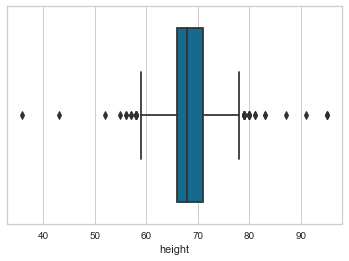

In [1882]:
sns.boxplot(df["height"])

In [1883]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9514 entries, 0 to 9513
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          9514 non-null   float64 
 1   body_type    9514 non-null   object  
 2   diet         9514 non-null   object  
 3   drinks       9514 non-null   float64 
 4   drugs        9514 non-null   float64 
 5   education    9514 non-null   object  
 6   ethnicity    9514 non-null   object  
 7   height       9514 non-null   float64 
 8   income       9514 non-null   category
 9   job          9514 non-null   object  
 10  last_online  9514 non-null   object  
 11  location     9514 non-null   object  
 12  orientation  9514 non-null   object  
 13  pets         9514 non-null   object  
 14  religion     9514 non-null   object  
 15  sex          9514 non-null   object  
 16  sign         9514 non-null   object  
 17  smokes       9514 non-null   int64   
 18  speaks       9514 non-null  

# regression


In [1884]:
abs(df.corr()['age']).sort_values(ascending=False)

age       1.000000
smokes    0.145601
drugs     0.115619
drinks    0.114700
status    0.027791
height    0.022078
Name: age, dtype: float64

In [1885]:
outliers = df.quantile(.97)
df = df[(df['age']<outliers['age'])]
#df = df[(df['height']<outliers['height'])]


In [1950]:
y = df["age"]

x = df.drop(["last_online","age" , "height" , "sign" , "speaks" , "location" ],axis=1)

In [1951]:
df_dummy = pd.get_dummies(df,drop_first=True)

In [1981]:
x = pd.get_dummies(x,drop_first=True)

In [1983]:
x.shape , y.shape

((9218, 71), (9218,))

In [1953]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [1954]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=13)

In [1955]:
import numpy as np

In [1956]:

from pycaret.regression import *
#exp_name = setup(data = df_dummy , target = "age" ,use_gpu = True)

#best_model = compare_models()


In [1957]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [1958]:
gbr.fit(x_train,y_train)
y_pred_gbr = gbr.predict(x_test)

In [1959]:
(mean_squared_error(y_test,y_pred_gbr))**0.5 , r2_score(y_test,y_pred_gbr)

(7.078642819331235, 0.20201370303291633)

yaş tahmininii +-7 olarak doğru tahmin ediyor

# Classifiacation

In [1961]:
df_class = df.copy()

In [1965]:
df_class["last_online"].max()  , df_class["last_online"].min()

# 10 sene öncenin verisidir

('2012-06-30-08-23', '2011-06-27-16-17')

In [1966]:
df["age"].max() , df["age"].min()

(56.0, 18.0)

In [1967]:
def gen(row):
    if row["age"]<=32:
        return 'Millennial'
    elif row["age"]<=47:
        return 'Gen X-er'
    else:
        return 'Boomers'

In [1971]:
df_class["gen"] = df_class[["age"]].apply(lambda row: gen(row) ,axis =1)

In [1973]:
df_class["gen"].value_counts()

Millennial    6047
Gen X-er      2721
Boomers        450
Name: gen, dtype: int64

In [1984]:
y = df_class["gen"]

x = df_class.drop(["last_online","age" , "height" , "sign" , "speaks" , "location" , "age" , "gen" ],axis=1)

In [1994]:
dfclass_dummy = pd.concat([pd.get_dummies(x) , y] , axis =1)

In [1993]:

from pycaret.classification import *
exp_name = setup(data = dfclass_dummy , target = "gen" ,use_gpu = True)

best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.6700,0.6666,0.3904,0.6155,0.6110,0.1613,0.1924,0.2990
gbc,Gradient Boosting Classifier,0.6693,0.7053,0.3796,0.6122,0.6031,0.1437,0.1788,2.5980
lr,Logistic Regression,0.6682,0.7019,0.3846,0.6146,0.6086,0.1535,0.1827,0.9150
ridge,Ridge Classifier,0.6658,0.0000,0.3699,0.5948,0.5941,0.1244,0.1602,0.0190
lda,Linear Discriminant Analysis,0.6618,0.6969,0.3871,0.6075,0.6035,0.1446,0.1711,0.0820
lightgbm,Light Gradient Boosting Machine,0.6593,0.6929,0.3972,0.6112,0.6203,0.1806,0.1938,1.8860
dummy,Dummy Classifier,0.6553,0.5000,0.3333,0.4294,0.5188,0.0000,0.0000,0.0100
xgboost,Extreme Gradient Boosting,0.6534,0.6859,0.3954,0.6064,0.6159,0.1707,0.1827,2.3320
svm,SVM - Linear Kernel,0.6489,0.0000,0.3885,0.6141,0.5877,0.1330,0.1684,0.2030
rf,Random Forest Classifier,0.6404,0.6543,0.3899,0.5935,0.6067,0.1512,0.1589,1.0750


In [1996]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

In [2000]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

from sklearn.metrics import confusion_matrix , classification_report

In [2006]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=13)

In [2007]:
gbc.fit(x_train,y_train)
y_pred_gbc = gbc.predict(x_test)

In [2011]:
accuracy_score(y_test , y_pred_gbc  ) , precision_score(y_test , y_pred_gbc, average = "micro"  ) , recall_score(y_test , y_pred_gbc , average = "micro" ) , f1_score(y_test, y_pred_gbc, average = "micro"  )

(0.6686550976138829,
 0.6686550976138829,
 0.6686550976138829,
 0.6686550976138829)